# Task Chroma-Keying

1. Remove the _background_ from image ```avengers.png```.
1. Insert another image in the background.

In [29]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [30]:
imfile = '../Imagens/avengers.png'
img_bgr = cv2.imread(imfile)
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

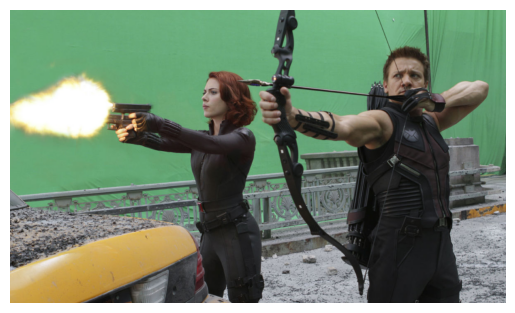

In [32]:
plt.imshow(img)
plt.axis(False)
plt.show()

## Solution 1

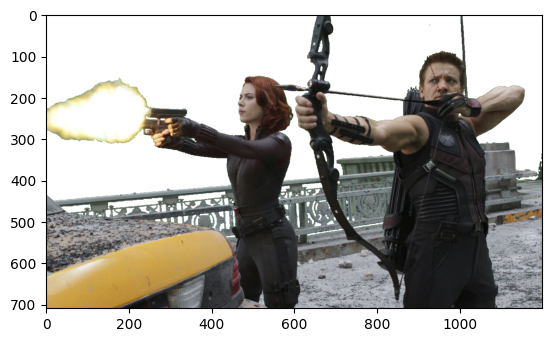

In [63]:
lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)
a_channel = lab[:,:,1]
th = cv2.threshold(a_channel,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
masked = cv2.bitwise_and(img, img, mask = th)
m1 = masked.copy()
m1[th==0]=(255,255,255)      
plt.imshow(m1)



## Solution 2

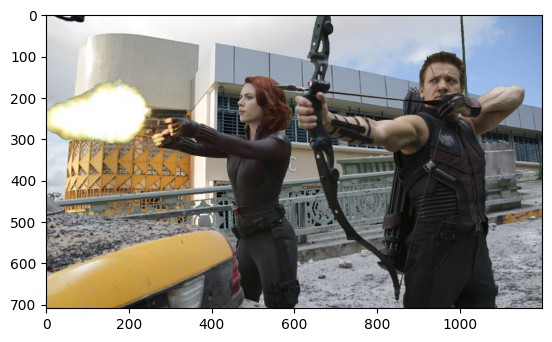

In [62]:
background = cv2.imread('../Imagens/ic.png')
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
background = cv2.resize(background, (img.shape[1], img.shape[0])) #resize the background to the same size as the image

# apply the mask to the background
masked_background = cv2.bitwise_and(background, background, mask = cv2.bitwise_not(th)) 
# combine the two images
final = cv2.bitwise_or(masked, masked_background)
plt.imshow(final)